In [53]:
import re
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag,pos_tag_sents
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer, PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt
import string

In [17]:
nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/shahzaib/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/shahzaib/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/shahzaib/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shahzaib/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
text= gutenberg.raw("shakespeare-hamlet.txt")

In [ ]:
#loading tweets
neutral_tweets = nltk.corpus.twitter_samples.strings('tweets.20150430-223406.json')#considering this neutral
neg_tweets = nltk.corpus.twitter_samples.strings('negative_tweets.json')
pos_tweets = nltk.corpus.twitter_samples.strings('positive_tweets.json')

#### Tokenization

In [22]:
#word_level Tokenization
tokens=word_tokenize(text)

In [31]:
#sentence level Tokenization
sentences=sent_tokenize(text)

#### Stopwords Removal

In [24]:
stop_words=set(stopwords.words('english'))

In [25]:
filtered_tokens=[token.lower() for token in tokens if token.lower() not in stop_words]

#### POS tagging

In [27]:
POS_tags_token=pos_tag(tokens)

In [38]:
#for sentence level POS tagging
#POS_tags_sent=pos_tag_sents(sentences)

#### n grams

In [42]:
bigrams=list(ngrams(filtered_tokens,2))

#### Lemmatization

In [45]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(token) for token in filtered_tokens]

#### Stemming

In [46]:
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(token) for token in filtered_tokens]

#### BOW

In [50]:
Counter(stemmed_words)

Counter({'[': 6,
         'tragedi': 4,
         'hamlet': 107,
         'william': 1,
         'shakespear': 1,
         '1599': 1,
         ']': 6,
         'actu': 2,
         'primu': 1,
         '.': 1879,
         'scoena': 1,
         'prima': 1,
         'enter': 86,
         'barnardo': 8,
         'francisco': 2,
         'two': 21,
         'centinel': 1,
         "'s": 119,
         '?': 459,
         'fran': 8,
         'nay': 26,
         'answer': 15,
         ':': 566,
         'stand': 19,
         '&': 25,
         'vnfold': 3,
         'self': 66,
         'bar': 7,
         'long': 18,
         'liue': 17,
         'king': 180,
         'come': 128,
         'care': 1,
         'vpon': 50,
         'hour': 8,
         "'t": 61,
         'strook': 4,
         'twelu': 5,
         ',': 2892,
         'get': 10,
         'thee': 58,
         'bed': 12,
         'releef': 1,
         'much': 43,
         'thank': 18,
         'bitter': 3,
         'cold': 6,
         's

In [51]:
Counter(stemmed_words).most_common(10)

[(',', 2892),
 ('.', 1879),
 (':', 566),
 ('?', 459),
 ('ham', 337),
 (';', 298),
 ('lord', 216),
 ("'d", 200),
 ('king', 180),
 ('haue', 175)]

In [52]:
chars=[tup[0] for tup in Counter(stemmed_words).most_common(10)]
counts=[tup[1] for tup in Counter(stemmed_words).most_common(10)]

<BarContainer object of 10 artists>

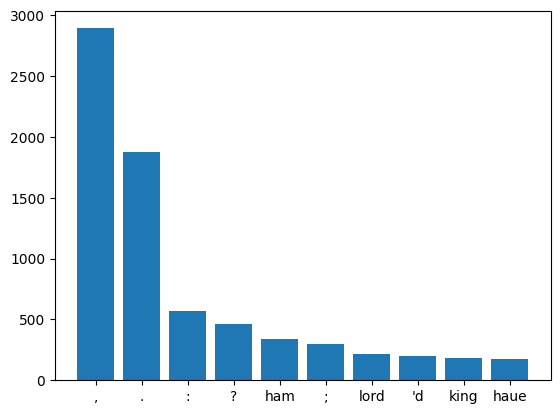

In [54]:
plt.bar(chars,counts)